# Assignment 1 2024

In this assignment, you will be asked to implement popular CNN architectures to solve a popular image classification problem, Fashion MNIST. Your codes must be written in Tensorflow and be executable under Google colab. You will need a GPU access where Google colab gives you such access free of charge. Your report can be written in the same document as your codes in .ipynb file. Every step carries a particular mark indicated in every instruction. Full mark is 140 points.

### 1. Import relevant libraries that you need [10 marks]

##### list all the libraries that you need here

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Activation
from skimage.transform import resize

### 2. Download the fashion MNIST dataset [5 marks]

##### The fashion MNIST dataset is available in the tensorflow. You can download it directly.

In [24]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


### 3. Visualize the dataset that has been downloaded. Yo need to plot the dataset in a batch and present them as a batch [10 marks]

##### Present your plot as a grid of images.

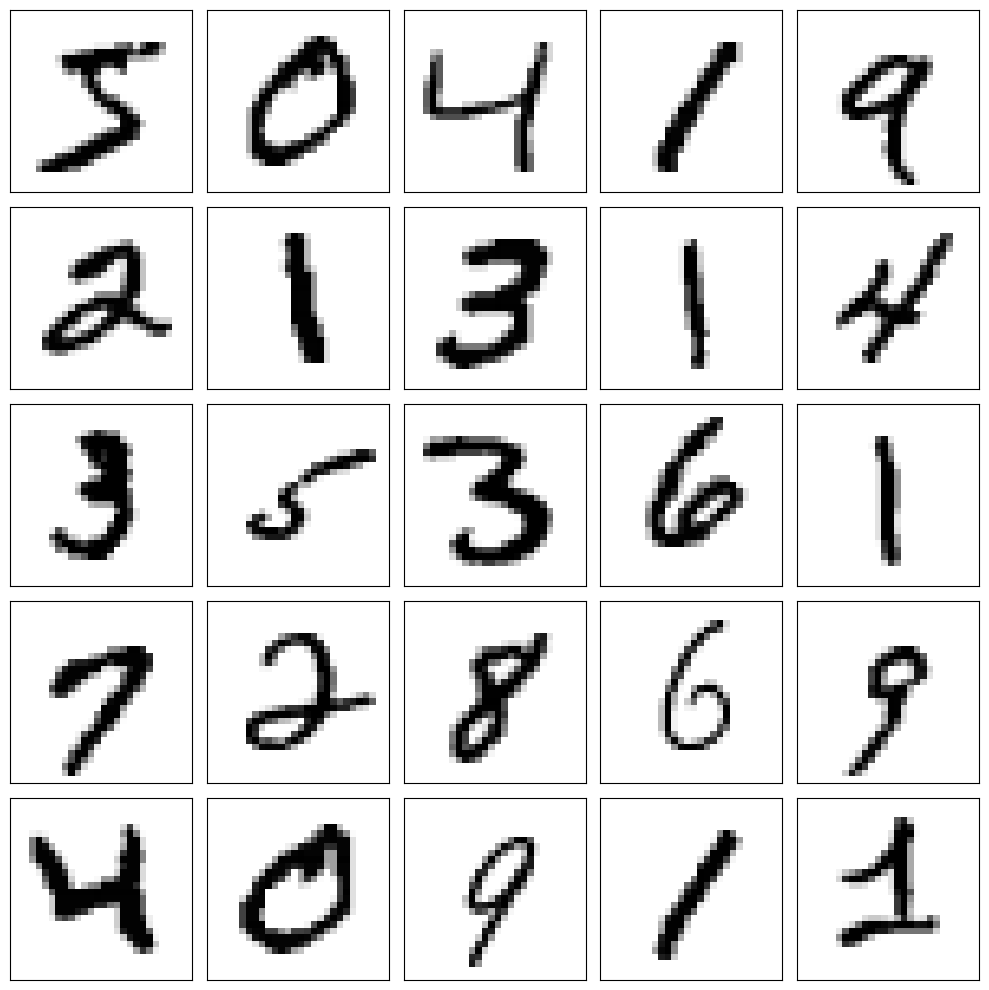

In [25]:
# Function to display a batch of images
def plot_batch(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
    plt.tight_layout()
    plt.show()

# Visualize the first 25 images from the training set
plot_batch(X_train[:25], y_train[:25])

### 4. Normalize the dataset into the range of $[0,1]$ [5 marks]


##### Normalization can be done by dividing with the maximum element.

In [26]:
X_train = X_train / 255
X_test = X_test / 255

X_train.shape, X_train.min(), X_train.max()

((60000, 28, 28), 0.0, 1.0)

### 5. Create two hidden layer neural networks where each hidden layer comprises 128 nodes [10 marks]

##### The neural network can be built and customized from the keras library.

In [42]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)


model = Sequential()

model.add(Dense(128, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
  # Hidden layer 2
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
  # Output layer
model.add(Dense(10))
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

### 6. Create the training environments to train the neural network created in the previous cell. Use cross entropy loss function and ADAM optimizer [5 marks].

##### The training environment can be created from model.compile() instruction.

In [43]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### 7. Train the network for 10 epochs with the batch size of 64 and validation split of 0.2. Training is performed under GPU [10 marks].

##### The network training process can be done using model.fit() instruction.

In [44]:
history = model.fit(X_train, Y_train, batch_size=64, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7964 - loss: 0.6684 - val_accuracy: 0.9553 - val_loss: 0.1449
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9451 - loss: 0.1807 - val_accuracy: 0.9659 - val_loss: 0.1131
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9616 - loss: 0.1279 - val_accuracy: 0.9712 - val_loss: 0.0962
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9684 - loss: 0.1047 - val_accuracy: 0.9730 - val_loss: 0.0872
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9730 - loss: 0.0881 - val_accuracy: 0.9748 - val_loss: 0.0840
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9751 - loss: 0.0789 - val_accuracy: 0.9743 - val_loss: 0.0849
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9783 - loss: 0.0661 - val_accuracy: 0.9749 - val_loss: 0.0841
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9806 - loss: 0.0586 - val_accuracy: 0.

### 8. Evaluate the model on the testing dataset and calculate the prediction accuracy [5 marks].

##### The evaluation can be done using model.evaluate() instruction.

In [45]:
model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9768 - loss: 0.0850


[0.07509937882423401, 0.9790999889373779]

### 9. Rescale the dataset to the size of $32×32$ [10 marks].




##### One way to rescale the image is through skimage.

### 10. Create ResNet50 Structure (https://arxiv.org/abs/1512.03385) [10 marks].

##### The resNet structure is readily available in the tensorflow library.

### 11. Create the training environment to train the ResNet50 based on the ResNet structure in the previous step. Use the cross entropy loss function and the ADAM optimizer [5 marks].

##### As with question 6, the training environments can be set by model.compile() instruction.

### 12. Train the ResNet50 for 10 epochs with the batch size of 64 and validation split of 0.2. Training is performed under GPU [10 marks].

##### As with question 7, the training process can be executed by model.fit() instruction.

### 13. Evaluate the model on the testing dataset and calculate the prediction accuracy [5 marks].



As with question 8, the evaluation can be done via model.evaluate() instruction.

### 14. Change your model to VGG16 (https://arxiv.org/abs/1409.1556v6) and repeat step 11 and 12 [20 marks].

##### VGG16 architecture is readily available from the tensorflow library.

### 15. Evaluate the trained VGG16 model on the testing dataset [5 marks].

##### Evaluation can be done in the same way as above. You need to pay attention to the testing dataset to be used for evaluation.

### 16. Explain why the VGG16 does not perform as good as other two architectures [15 marks]. Your answer is written in this document.

In [ ]:
#### Write your answer here